<a href="https://colab.research.google.com/github/Dailehit/nanoQSAR/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install lmfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 10.4 MB/s eta 0:00:00


# Новый раздел

In [ ]:
import pandas as pd
import os
import math
import random

import numpy as np
from scipy import optimize, signal

import matplotlib.pyplot as plt
import seaborn as sns

import pyparsing
import argparse


from itertools import compress
from lmfit import models

In [ ]:
!gdown 1lzEvnO4LRhf_QLdBr9qEZxx-wmVGblG9

Downloading...
From: https://drive.google.com/uc?id=1lzEvnO4LRhf_QLdBr9qEZxx-wmVGblG9
To: /content/samples_for_the_diploma.zip
100% 548k/548k [00:00<00:00, 83.7MB/s]


In [ ]:
!unzip samples_for_the_diploma.zip

Archive:  samples_for_the_diploma.zip
   creating: образцы для диплома/
  inflating: __MACOSX/._образцы для диплома  
  inflating: образцы для диплома/Fe3O4.dat  
  inflating: __MACOSX/образцы для диплома/._Fe3O4.dat  
  inflating: образцы для диплома/Fe3O4-HA 20 Cr_Юр.dat  
  inflating: __MACOSX/образцы для диплома/._Fe3O4-HA 20 Cr_Юр.dat  
  inflating: образцы для диплома/APK 8_190309160042.txt  
  inflating: __MACOSX/образцы для диплома/._APK 8_190309160042.txt  
  inflating: образцы для диплома/.DS_Store  
  inflating: __MACOSX/образцы для диплома/._.DS_Store  
  inflating: образцы для диплома/Fe3O4 22-04-28_190309042050.txt  
  inflating: __MACOSX/образцы для диплома/._Fe3O4 22-04-28_190309042050.txt  
  inflating: образцы для диплома/12.dat  
  inflating: __MACOSX/образцы для диплома/._12.dat  
  inflating: образцы для диплома/MAY 2022-03-14_170307100734.txt  
  inflating: __MACOSX/образцы для диплома/._MAY 2022-03-14_170307100734.txt  
  inflating: образцы для диплома/Fe3O4-HA 5

In [ ]:
for dirpath, _, filenames in os.walk('образцы для диплома/'):
  for filename in filenames:
    print(os.path.join(dirpath, filename))

образцы для диплома/12.dat
образцы для диплома/MAY 2022-03-14_170307100734.txt
образцы для диплома/Fe304 2022-03-14_170305145002.txt
образцы для диплома/APK 7_190309102801.txt
образцы для диплома/Fe3O4.dat
образцы для диплома/7.dat
образцы для диплома/MTAG_170307121638.txt
образцы для диплома/MTA osad_170128111815.txt
образцы для диплома/APK 9_190309185610.txt
образцы для диплома/Fe3O4-HA 80 Cr_Юр.dat
образцы для диплома/APK 8_190309160042.txt
образцы для диплома/Fe3O4-HA 20 Cr_Юр.dat
образцы для диплома/Fe3O4-HA 50 Cr Юр.dat
образцы для диплома/MGK okisl 2018-12-11_170307161922.txt
образцы для диплома/Fe3O4 22-04-28_190309042050.txt
образцы для диплома/Magnet 12-10-18_190309081141.txt
образцы для диплома/.DS_Store
образцы для диплома/M okisl 2018-12-11_170307141237.txt
образцы для диплома/6.dat
образцы для диплома/KA_Fe3O4_170127102755.txt
образцы для диплома/Fe3O4-HA magnet (МГКм).txt
образцы для диплома/APK 10_190309223104.txt
образцы для диплома/3.dat


In [ ]:
class XRD_parser:
    """
    Parser of XRD data based on fname
    """
    def __init__(self):
        self.get_extension = lambda x: os.path.splitext(x)[-1]
        self.availabel_extensions = {'.UXD', '.dat', '.txt', '.xyd'}
    def _is_float(self, element: any)-> bool:
        try:
            element = element.decode('utf-8').strip().split()[0]
        except:
            return False
        if element is None:
            return False
        try:
            float(element)
            return True
        except ValueError:
            return False

    def _convert_to_float(self, element:str)->list:
        try:
            element = element.decode('utf-8').strip().split()
            return [float(value) for value in element ]
        except ValueError:
            return []


    def parse(self, fname:str)->list:
        with open(fname, 'rb') as file:
            data = file.readlines()
        mask = list(map(self._is_float, data))
        selection = list(compress(data, mask))
        xrd_data = list(map(self._convert_to_float, selection))
        return xrd_data

In [ ]:
dirname = 'образцы для диплома/'
files = os.listdir(dirname)

# read UXD
fname = os.path.join(dirname, files[0])
with open(fname, 'rb') as file:
    data = file.readlines()

In [ ]:
parser = XRD_parser()

In [ ]:
for dirpath, _, filenames in os.walk('образцы для диплома/'):
  for filename in filenames:
    print(os.path.join(dirpath, filename))

образцы для диплома/12.dat
образцы для диплома/MAY 2022-03-14_170307100734.txt
образцы для диплома/Fe304 2022-03-14_170305145002.txt
образцы для диплома/APK 7_190309102801.txt
образцы для диплома/Fe3O4.dat
образцы для диплома/7.dat
образцы для диплома/MTAG_170307121638.txt
образцы для диплома/MTA osad_170128111815.txt
образцы для диплома/APK 9_190309185610.txt
образцы для диплома/Fe3O4-HA 80 Cr_Юр.dat
образцы для диплома/APK 8_190309160042.txt
образцы для диплома/Fe3O4-HA 20 Cr_Юр.dat
образцы для диплома/Fe3O4-HA 50 Cr Юр.dat
образцы для диплома/MGK okisl 2018-12-11_170307161922.txt
образцы для диплома/Fe3O4 22-04-28_190309042050.txt
образцы для диплома/Magnet 12-10-18_190309081141.txt
образцы для диплома/.DS_Store
образцы для диплома/M okisl 2018-12-11_170307141237.txt
образцы для диплома/6.dat
образцы для диплома/KA_Fe3O4_170127102755.txt
образцы для диплома/Fe3O4-HA magnet (МГКм).txt
образцы для диплома/APK 10_190309223104.txt
образцы для диплома/3.dat


In [ ]:
df_full = []
df_full_last_of_us = []
for filename in filenames:
  df_full.append(os.path.join(dirpath, filename)) # собираю все файлы в один массив
  df_full_last_of_us.append(os.path.join(dirpath, filename))
df_full

['образцы для диплома/12.dat',
 'образцы для диплома/MAY 2022-03-14_170307100734.txt',
 'образцы для диплома/Fe304 2022-03-14_170305145002.txt',
 'образцы для диплома/APK 7_190309102801.txt',
 'образцы для диплома/Fe3O4.dat',
 'образцы для диплома/7.dat',
 'образцы для диплома/MTAG_170307121638.txt',
 'образцы для диплома/MTA osad_170128111815.txt',
 'образцы для диплома/APK 9_190309185610.txt',
 'образцы для диплома/Fe3O4-HA 80 Cr_Юр.dat',
 'образцы для диплома/APK 8_190309160042.txt',
 'образцы для диплома/Fe3O4-HA 20 Cr_Юр.dat',
 'образцы для диплома/Fe3O4-HA 50 Cr Юр.dat',
 'образцы для диплома/MGK okisl 2018-12-11_170307161922.txt',
 'образцы для диплома/Fe3O4 22-04-28_190309042050.txt',
 'образцы для диплома/Magnet 12-10-18_190309081141.txt',
 'образцы для диплома/.DS_Store',
 'образцы для диплома/M okisl 2018-12-11_170307141237.txt',
 'образцы для диплома/6.dat',
 'образцы для диплома/KA_Fe3O4_170127102755.txt',
 'образцы для диплома/Fe3O4-HA magnet (МГКм).txt',
 'образцы для ди

In [ ]:
df_full.remove('образцы для диплома/.DS_Store')
df_full

['образцы для диплома/12.dat',
 'образцы для диплома/MAY 2022-03-14_170307100734.txt',
 'образцы для диплома/Fe304 2022-03-14_170305145002.txt',
 'образцы для диплома/APK 7_190309102801.txt',
 'образцы для диплома/Fe3O4.dat',
 'образцы для диплома/7.dat',
 'образцы для диплома/MTAG_170307121638.txt',
 'образцы для диплома/MTA osad_170128111815.txt',
 'образцы для диплома/APK 9_190309185610.txt',
 'образцы для диплома/Fe3O4-HA 80 Cr_Юр.dat',
 'образцы для диплома/APK 8_190309160042.txt',
 'образцы для диплома/Fe3O4-HA 20 Cr_Юр.dat',
 'образцы для диплома/Fe3O4-HA 50 Cr Юр.dat',
 'образцы для диплома/MGK okisl 2018-12-11_170307161922.txt',
 'образцы для диплома/Fe3O4 22-04-28_190309042050.txt',
 'образцы для диплома/Magnet 12-10-18_190309081141.txt',
 'образцы для диплома/M okisl 2018-12-11_170307141237.txt',
 'образцы для диплома/6.dat',
 'образцы для диплома/KA_Fe3O4_170127102755.txt',
 'образцы для диплома/Fe3O4-HA magnet (МГКм).txt',
 'образцы для диплома/APK 10_190309223104.txt',
 '

In [ ]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from scipy.signal import savgol_filter

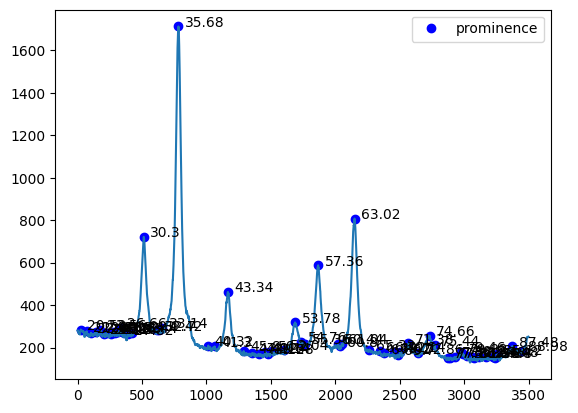

Положение последнего пика в градусах: 88.98


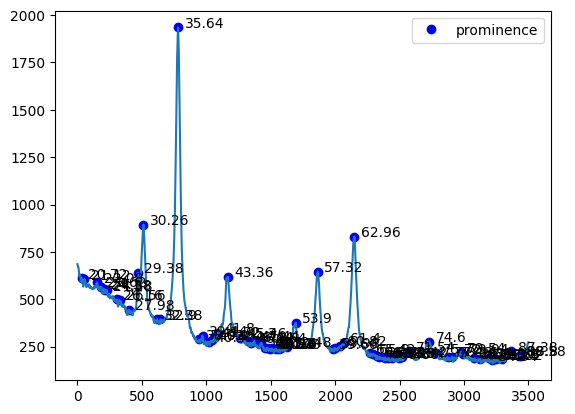

Положение последнего пика в градусах: 88.8


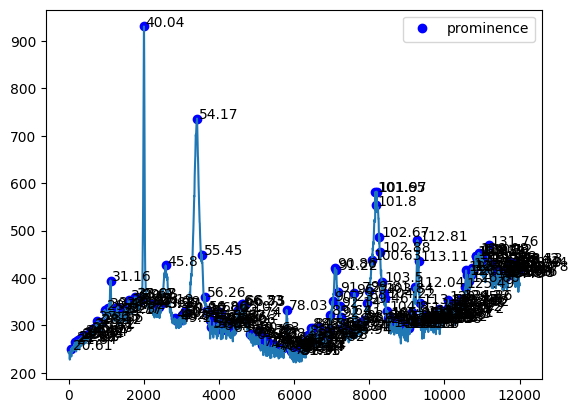

Положение последнего пика в градусах: 139.78


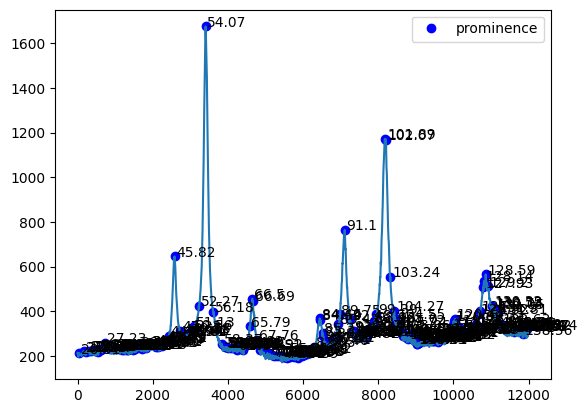

Положение последнего пика в градусах: 139.74


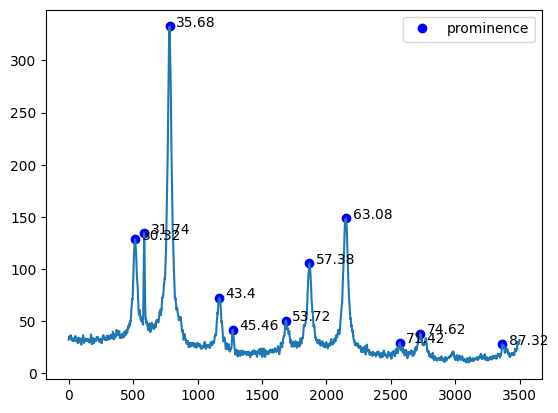

Положение последнего пика в градусах: 87.32


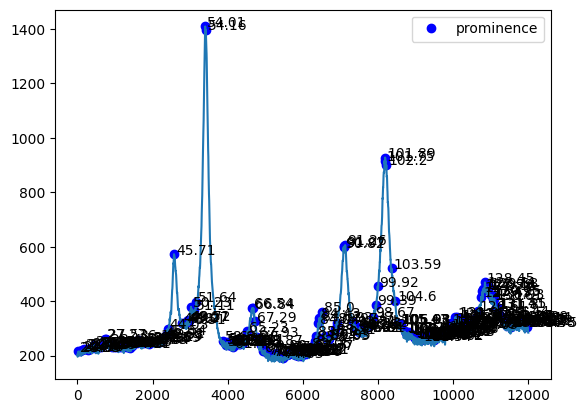

Положение последнего пика в градусах: 139.75


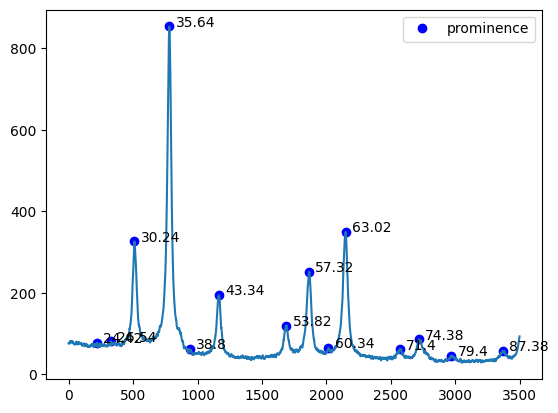

Положение последнего пика в градусах: 87.38


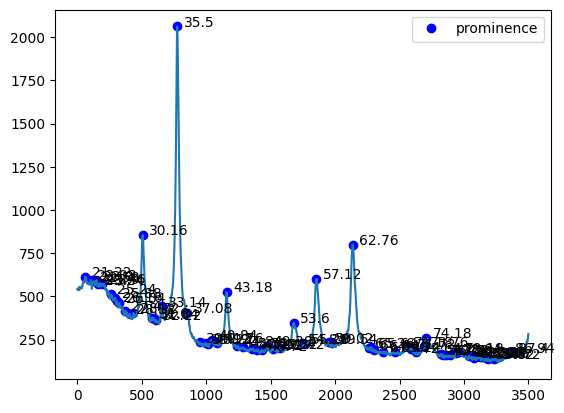

Положение последнего пика в градусах: 87.4


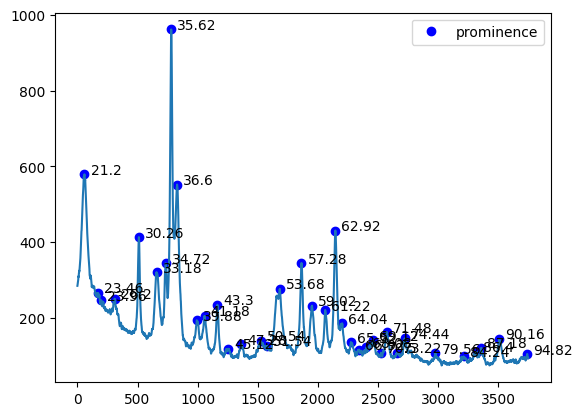

Положение последнего пика в градусах: 94.82


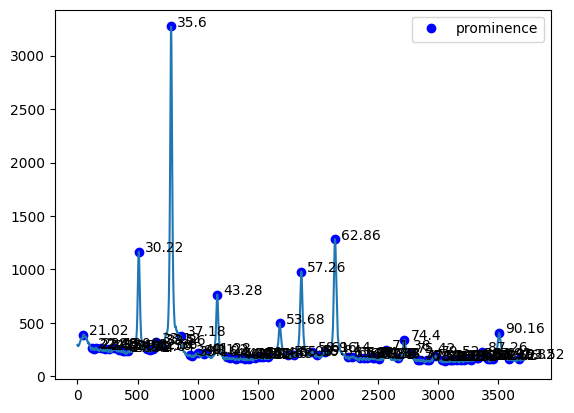

Положение последнего пика в градусах: 93.52


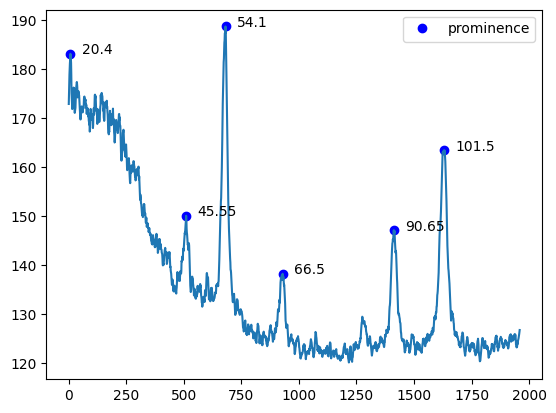

Положение последнего пика в градусах: 101.5


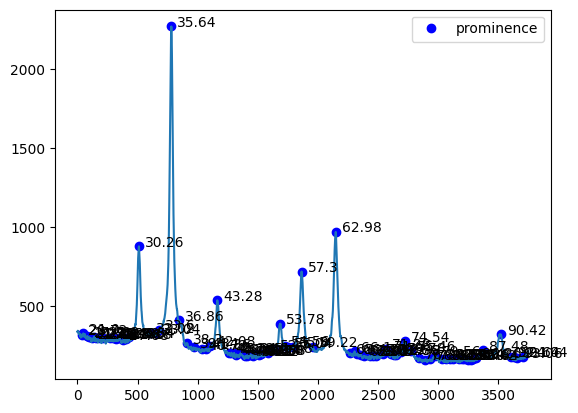

Положение последнего пика в градусах: 94.04


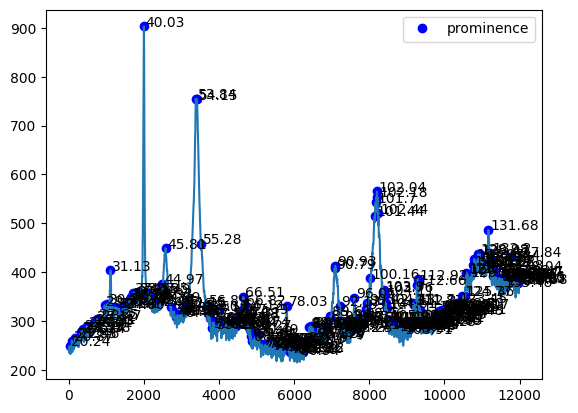

Положение последнего пика в градусах: 139.58


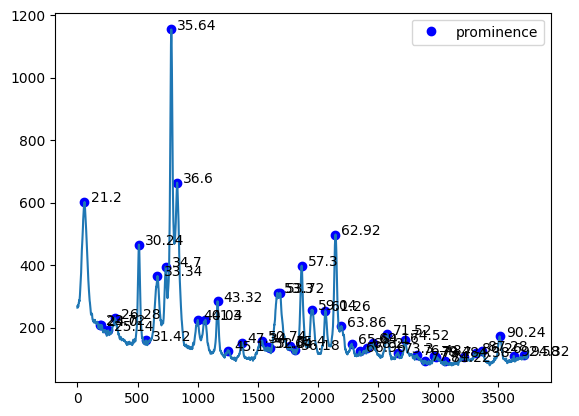

Положение последнего пика в градусах: 94.32


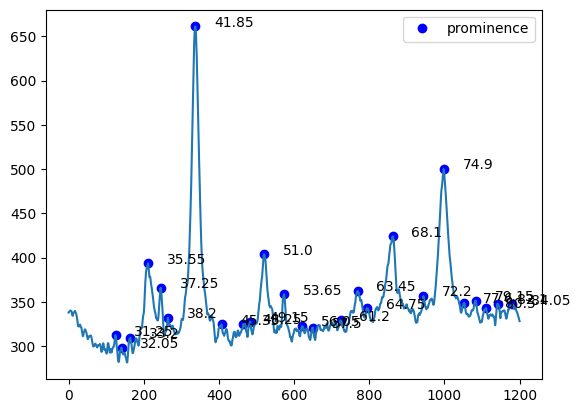

Положение последнего пика в градусах: 84.05


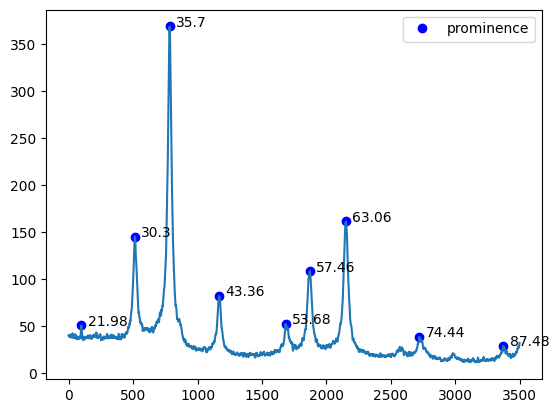

Положение последнего пика в градусах: 87.48


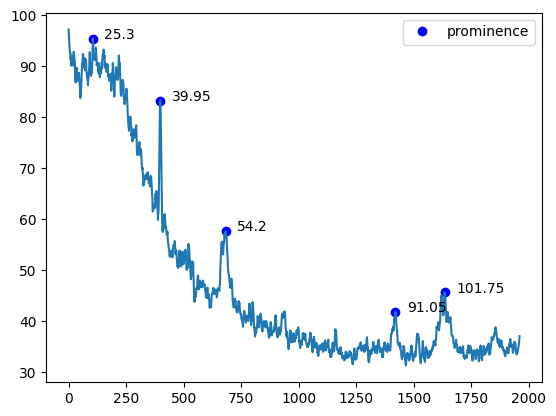

Положение последнего пика в градусах: 101.75


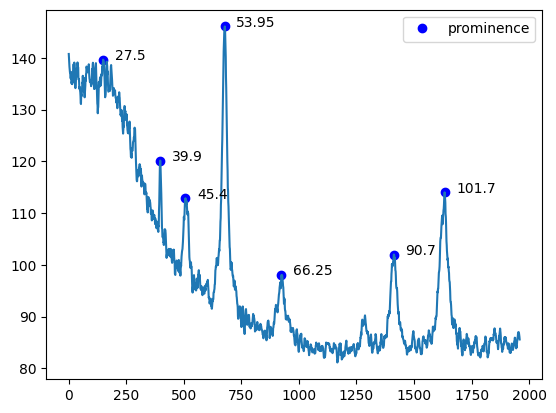

Положение последнего пика в градусах: 101.7


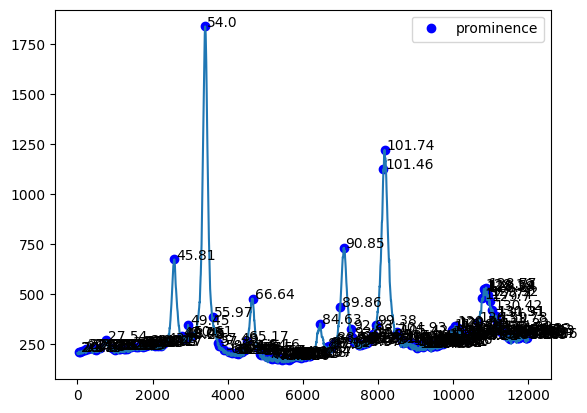

Положение последнего пика в градусах: 139.66


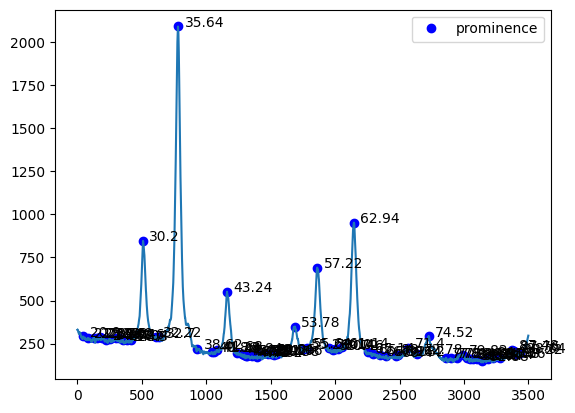

Положение последнего пика в градусах: 88.64


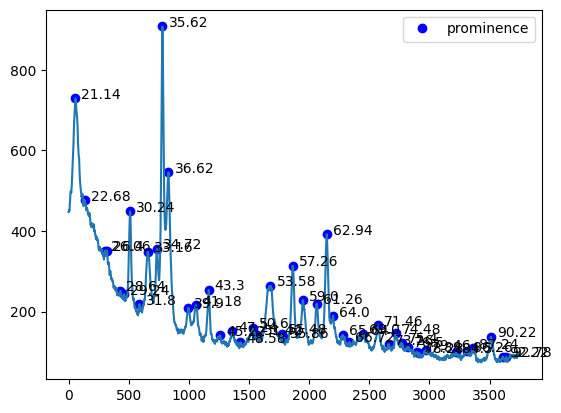

Положение последнего пика в градусах: 92.78


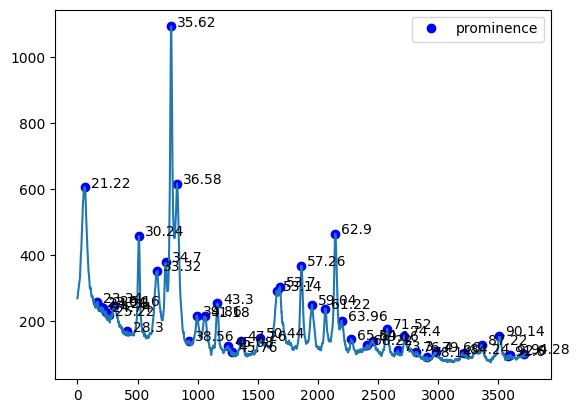

Положение последнего пика в градусах: 94.28


In [ ]:
for file in df_full:
    fname = os.path.join(dirname, file)
    data = parser.parse(fname=file)
    df = pd.DataFrame(data )
    df = df.iloc[:, :2]
    df.columns = ['x','y']
    df.loc[:, 'savgol'] = signal.savgol_filter(df.y, 15,2) # 15 and 1 parameters


    mask = df['x']>20
    df = df.loc[mask]
    x = df['savgol'].values
    peaks, _ = find_peaks(x, prominence= 10, width = 5)
    plt.plot(peaks, x[peaks], "ob")
    plt.plot(x)
    plt.legend(['prominence'])



    for i, peak in enumerate(peaks):
        degree = df['x'].values[peak]
        plt.annotate(round(degree, 2), (peak+50, x[peak]))

    plt.show()
    # Как найти градус для последнего пика?


    degree = df['x'].values[peaks[-1]]
    print("Положение последнего пика в градусах:", degree)


In [ ]:
predictions = {'./образцы для диплома/Fe3O4-HA 20 Cr_Юр.dat': 8.363221595590925,
 './образцы для диплома/Fe3O4-HA 50 Cr Юр.dat': 8.351325387246792,
 './образцы для диплома/Fe3O4-HA 80 Cr_Юр.dat': 8.348360592010588,
 './образцы для диплома/3.dat': 8.340078793823276,
 './образцы для диплома/7.dat': 8.335359293018836,
 './образцы для диплома/12.dat': 8.340078793823276,
 './образцы для диплома/6.dat': 8.331237438422955,
 './образцы для диплома/Fe3O4.dat': 8.348953255488345,
 './образцы для диплома/KA_Fe3O4_170127102755.txt': 8.330185508528498,
 './образцы для диплома/MTA osad_170128111815.txt': 8.33255513088039,
 './образцы для диплома/Fe304 2022-03-14_170305145002.txt': 8.337299184561486,
 './образцы для диплома/APK 9_190309185610.txt': 8.351569926601776,
 './образцы для диплома/M okisl 2018-12-11_170307141237.txt': 8.346806570264173,
 './образцы для диплома/MGK okisl 2018-12-11_170307161922.txt': 8.337299184561486,
 './образцы для диплома/APK 8_190309160042.txt': 8.349187441873166,
 './образцы для диплома/MAY 2022-03-14_170307100734.txt': 8.344427310250191,
 './образцы для диплома/APK 7_190309102801.txt': 8.346806570264173,
 './образцы для диплома/MTAG_170307121638.txt': 8.368292615526629,
 './образцы для диплома/APK 10_190309223104.txt': 8.349187441873166,
 './образцы для диплома/Fe3O4 22-04-28_190309042050.txt': 8.356339741525952,
 './образцы для диплома/Magnet 12-10-18_190309081141.txt': 8.342049660308572}

In [ ]:
predictions = pd.DataFrame(list(predictions. items ()), columns = ['filename', 'parameters'])

In [ ]:
Ec50 = ['108809.46', '4328.76', '46.5', '0', '0', '0', '0', '78476', '34773627.69',
        '2.04','0','25.76', '28.23', '6.834', '117.3', '0', '29308932.453', '0.8', '0', '0', '0']

In [ ]:
EC50 = []
for item in Ec50:
    EC50.append(float(item))
print(EC50)

[108809.46, 4328.76, 46.5, 0.0, 0.0, 0.0, 0.0, 78476.0, 34773627.69, 2.04, 0.0, 25.76, 28.23, 6.834, 117.3, 0.0, 29308932.453, 0.8, 0.0, 0.0, 0.0]


In [ ]:
for i in range(len(EC50)):
  if EC50[i]  > 0 and EC50[i]< 100:
    EC50[i] = 1
  else:
    EC50[i] = 0
EC50

[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]

In [ ]:
predictions.insert (loc= 2 , column='EC50', value=EC50)
predictions.round(5)
predictions

,filename,parameters,EC50
0,./образцы для диплома/Fe3O4-HA 20 Cr_Юр.dat,8.363222,1.088095e+05
1,./образцы для диплома/Fe3O4-HA 50 Cr Юр.dat,8.351325,4.328760e+03
2,./образцы для диплома/Fe3O4-HA 80 Cr_Юр.dat,8.348361,4.650000e+01
3,./образцы для диплома/3.dat,8.340079,0.000000e+00
4,./образцы для диплома/7.dat,8.335359,0.000000e+00
5,./образцы для диплома/12.dat,8.340079,0.000000e+00
6,./образцы для диплома/6.dat,8.331237,0.000000e+00
7,./образцы для диплома/Fe3O4.dat,8.348953,7.847600e+04
8,./образцы для диплома/KA_Fe3O4_170127102755.txt,8.330186,3.477363e+07
9,./образцы для диплома/MTA osad_170128111815.txt,8.332555,2.040000e+00


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
predictions

,filename,parameters,EC50
0,./образцы для диплома/Fe3O4-HA 20 Cr_Юр.dat,8.363222,0
1,./образцы для диплома/Fe3O4-HA 50 Cr Юр.dat,8.351325,0
2,./образцы для диплома/Fe3O4-HA 80 Cr_Юр.dat,8.348361,1
3,./образцы для диплома/3.dat,8.340079,0
4,./образцы для диплома/7.dat,8.335359,0
5,./образцы для диплома/12.dat,8.340079,0
6,./образцы для диплома/6.dat,8.331237,0
7,./образцы для диплома/Fe3O4.dat,8.348953,0
8,./образцы для диплома/KA_Fe3O4_170127102755.txt,8.330186,0
9,./образцы для диплома/MTA osad_170128111815.txt,8.332555,1


In [ ]:
!pip -q install tsfel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.7 MB/s eta 0:00:00


In [ ]:
import tsfel
import pandas as pd

# load dataset
# df = pd.read_csv('Dataset.txt')

# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()

# Extract features


In [ ]:

# temporarily = pd.DataFrame()

general = pd.DataFrame()
for file in predictions['filename']:
    fname = os.path.join(dirname, file)
    data = parser.parse(fname=file)
    df = pd.DataFrame(data)

    df = df.iloc[:, :2]
    df.columns = ['x','y']
    df.loc[:, 'savgol'] = signal.savgol_filter(df.y, 15,2) # 15 and 1 parameters


    mask = df['x']>20
    df = df.loc[mask]
    # Retrieves a pre-defined feature configuration file to extract all available features



    cfg = tsfel.get_features_by_domain('spectral')

    # Extract features
    X = tsfel.time_series_features_extractor(cfg, df[['savgol']])
    # X['EC50'] = np.random.normal(loc=10)
    general = pd.concat([general, X])
    # break

*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'savgol'] = signal.savgol_filter(df.y, 15,2) # 15 and 1 parameters
<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***
*** Feature extraction started ***
26


<ipython-input-354-e526868af9f7>:23: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, df[['savgol']])



*** Feature extraction finished ***


In [ ]:
corr_features = tsfel.correlated_features(general, threshold=0.7)
general.drop(corr_features, axis=1, inplace=True)

general['EC50'] = EC50

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
X = general.drop(columns='EC50')
y = general['EC50']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Импорт всех нужных библиотек
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
rf = RandomForestRegressor (n_estimators=100)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
r2_score = rf.score(X_test, y_test)
print("R2_score = {}%".format(r2_score * 100))

R2_score = -38.09491276388164%


In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
clf.score(X_train, y_train)

1.0

In [ ]:
clf.score(X_test, y_test) # проверка на переобученность модели
clf_score = clf.score(X_test, y_test)
print("clf_score = {}%".format(clf_score * 100))

clf_score = 57.14285714285714%


In [ ]:
clf = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.001,
                                       max_depth=100, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

ValueError: ignored

In [ ]:
y_pred = clf.predict(X_test)
X_pred = clf.predict(X_test)

AttributeError: ignored

In [ ]:
cm = confusion_matrix(y_test, X_pred, labels=clf.classes_)

In [ ]:
isp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                     display_labels=clf.classes_)

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Not-toxic', 'Toxic']))

              precision    recall  f1-score   support

   Not-toxic       0.83      0.83      0.83         6
       Toxic       0.00      0.00      0.00         1

    accuracy                           0.71         7
   macro avg       0.42      0.42      0.42         7
weighted avg       0.71      0.71      0.71         7



In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=4)

In [ ]:
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
KNN_prediction = KNN_model.predict(X_test)

In [ ]:
print(classification_report(y_test, KNN_prediction, target_names = ['Not-toxic', 'Toxic']))

              precision    recall  f1-score   support

   Not-toxic       0.86      1.00      0.92         6
       Toxic       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0) # дерево решений
clf

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
X_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, KNN_prediction, target_names = ['Not-toxic', 'Toxic']))

              precision    recall  f1-score   support

   Not-toxic       0.71      1.00      0.83         5
       Toxic       0.00      0.00      0.00         2

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
